<h1 style="font-size: 50px">Gym 0.24version Demo </h1>

<h1>General Set Up</h1>

In [17]:
!pip uninstall -y gym_super_mario_bros nes_py
!pip install gym_super_mario_bros==7.3.0 nes_py

Found existing installation: gym-super-mario-bros 7.3.0
Uninstalling gym-super-mario-bros-7.3.0:
  Successfully uninstalled gym-super-mario-bros-7.3.0
Found existing installation: nes-py 8.2.1
Uninstalling nes-py-8.2.1:
  Successfully uninstalled nes-py-8.2.1
  Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl (198 kB)
  Using cached nes_py-8.2.1-cp39-cp39-macosx_10_9_x86_64.whl


In [18]:
!pip uninstall gym -y
!pip install gym==0.24
#installしたら一旦、kernel shut downしてgym version check

Found existing installation: gym 0.26.0
Uninstalling gym-0.26.0:
  Successfully uninstalled gym-0.26.0
  Using cached gym-0.24.0-py3-none-any.whl


In [1]:
import gym
print(gym.__version__)

0.24.0


/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:423: UserWarning: WARN: Custom namespace `ALE` is being overridden by namespace `ALE`. If you are developing a plugin you shouldn't specify a namespace in `register` calls. The namespace is specified through the entry point package metadata.
  logger.warn(


<h1>Set Up For Basic Practice</h1>

In [2]:
import gym_super_mario_bros #Mario環境
from nes_py.wrappers import JoypadSpace #simpified controller (controller buttonの数を減らす)
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT #simplified command (A button+B button+R button, etc多変だから)

In [3]:
#上記を実際にset #gym0.26versionの場合は、env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True, render_mode="human")
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:568: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:619: UserWarning: WARN: Env check failed with the following message: Calling the reset method with `return_info=True` did not return a 2-tuple
You can set `disable_env_checker=True` to disable this check.
  logger.warn(


<h1>Mario Basic Practice</h1>

In [4]:
done = True #1行目にdone=Trueを置いておくことで、ensure最初のstepがenv.reset()される

for step in range(100): 
    
    if done: #最初のstep
        env.reset()

    #doneがTrueであろうがFalseであろうが以下の処理
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()

env.close()

2023-08-02 19:06:46.929 python[53156:1205803] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa48b30ebc0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-08-02 19:06:46.930 python[53156:1205803] Warning: Expected min height of view: (<NSButton: 0x7fa48b305660>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-08-02 19:06:46.931 python[53156:1205803] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa48b308e50>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-08-02 19:06:46.932 python[53156:1205803] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa48b31e700>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


<h1>Advanced Set Up</h1>

In [29]:
#pytorchとstable baselinesをtutorial codeにてinstallしようとしたら、not available
#python versionが最新過ぎて(不可逆的にjupiterでは3.9)、対応するpytorchとstable baselinesが見当たらない
#とりあえず、version specifyせずに、installしてみることにする...
# Install stable baselines for RL stuff
!pip install torch torchvision torchaudio 
!pip install "stable-baselines3[extra]"

In [5]:
import torch  #importing a super brain (PyTorch) for your AI.
import stable_baselines3 #importing a book of strategies (Stable Baselines3) for your AI

print("PyTorch version: ", torch.__version__)
print("Stable Baselines3 version: ", stable_baselines3.__version__)

/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
2023-08-02 19:06:57.579477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected vers

PyTorch version:  2.0.1
Stable Baselines3 version:  2.0.0


In [6]:
from gym.wrappers import GrayScaleObservation #Preprocessing: imageをRGBcolorからGrayscaleへとconvertすることにより、処理しやすく
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
#importしたa book of strategies (Stable Baselines3) for your AIからVecFrameStack, DummyVecEnvを参照

#・DummyVecEnv:
#教室にて、先生がたくさんの生徒に共通のtaksを授業内にてやらせる (workbookのpage Aからpage Bまでみたいな)
#先生はそれぞれの生徒が取り組んでる課題を全て把握 (yet生徒個々のexperienceは違くなるかもだけど、ある生徒はすぐtask終わる一方、他の人は憤慨)
#こうすることにより、複数の生徒を同時に学習させることが出来る
#DummyVecEnvなしだと、ひとりしか生徒教えられない

#・VecFrameStack:
#a memory book that allows the AI to remember and consider several past events (frames), not just the most recent one.
#robotにballをcatchする動作を教える時に、ballの画像1枚じゃ都合が悪い、ballが落下する最後の複数枚の画像を学習に活用することにより
#そのballの軌道を効率的に教えることが出来る。
#単純に、静止画1枚じゃ、ball catchする際にballの軌道予測するの無理でしょ
from matplotlib import pyplot as plt

In [7]:
env = gym_super_mario_bros.make('SuperMarioBros-v0') #この時点にてenvは、RGB format with shape (240, 256, 3)
env = JoypadSpace(env, SIMPLE_MOVEMENT)
#上記2行basic practice時に、すでにmakeしてるから任意だけど、advanced practiceだけ試したい時用

env = GrayScaleObservation(env, keep_dim=True) #この時点にてenvは、grayscale format with shape (240, 256, 1)
#RGBcolorをGrayScaleに変換してdataのdimensionを下げることにより、RLの処理を高める

#env = gym_super_mario_bros.make('SuperMarioBros-v0')だけだと、env = DummyVecEnv([lambda: env])をかけた時、AttributeError: 'SuperMarioBrosEnv' object has no attribute 'render_mode'が出る
#だから無理やり、'SuperMarioBrosEnv' objectにinitにて'render_mode' attribute加える
class CustomWrapper(gym.Wrapper):
    def __init__(self, env):
        super(CustomWrapper, self).__init__(env)
        self.render_mode = 'human'  # add this line
        
    def reset(self, seed=None, options=None):
        observation, reset_info = super().reset(), {}
        #print(f"observation type: {type(observation)}, shape: {observation.shape}") #結果: observation type: <class 'numpy.ndarray'>, shape: (240, 256, 1)
        return observation, reset_info
    
    def step(self, action): #ValueError: not enough values to unpack (expected 5, got 4)なので追加必要 #DummyVecEnv expect 5values but gym 0.24 step() returns only 4 values
        observation, reward, done, info = self.env.step(action)
        return observation, reward, done, info, {} # Return an empty dictionary instead of None

env = CustomWrapper(env)



#wrapperを一度通っちゃうと、obsevationのformatが変わっちゃって、grayscaleが出来なくなっちゃう
#だからenv = GrayScaleObservation(env, keep_dim=True)はwrapperの前に置く
###e.g.###

#wrapper内のformat
#・observation type: <class 'numpy.ndarray'>, shape: (240, 256, 1)
#・上記のprint(f"observation type: {type(observation)}, shape: {observation.shape}")によって確認可能

#wrapper後のformat
#・Observation after CustomWrapper type: <class 'tuple'>, structure: (array([[[104, 136, 252],・・・etc, [228,  92,  16]]], dtype=uint8), {})
#・下記のprintによって確認可能
#custom_state = env.reset()
#print(f"Observation after CustomWrapper type: {type(custom_state)}, structure: {custom_state}")


env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')
#今回はthe most recent oneだけでなく、最後の"4"frameをrememberする指定 #ここでいうframeとは、gameにおける場面毎のscreenshot

#DummyVecEnv->VecFrameStackの順番が大事
#教室にて生徒に共通taskさせる環境を整えてから、最後の複数枚画像(not静止画1枚)を、教育することにより、生徒に同時にたくさん教え込むことが出来る

/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:568: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:619: UserWarning: WARN: Env check failed with the following message: Calling the reset method with `return_info=True` did not return a 2-tuple
You can set `disable_env_checker=True` to disable this check.
  logger.warn(
/Users/ishikawatakehiro/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


<h1>Progress Of Advanced Set Up</h1>

(1, 240, 256, 4)


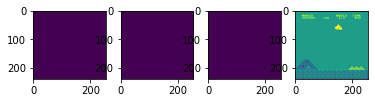

In [8]:
###⭐️以下の2点を図示して確認したい⭐️###
#・VecFrameStack wrapperにて最後の4枚とmemoryと指定したから、stateは4枚のconsecutive images(4枚のgame screenshots)が入ってる
#・state = env.reset()したから、今回はenv.reset()した状態の1枚(4th)を除き、それより前の1~3thはresetされてるから見れない

state = env.reset()
state, reward, done, info = env.step([5])
#VecFrameStack wrapperにて最後の4枚とmemoryと指定したから、stateは4枚のconsecutive images(4枚のgame screenshots)が入ってる
#state = env.reset()したから、今回はenv.reset()した状態の1枚(4th)を除き、それより前の1~3thはresetされてるから見れない

###stateが(batch size, width, height, channel)のimage dataである事を確認###
print(state.shape)
#stateはscreenshotsのimage dataだから、(batch size, width, height, channel) #result: (1, 240, 256, 4)
#->(batchsize1個(the latest memory4枚にて1セット), 240width, 256height, channel4)

#このstateに入ってる4枚のconsecutive imagesにおける、例えば、2枚目とかを見るためにはどうすれば良いだろう
#state[1]だと、それは2nd envの状態を示すから違う。
#cf.state[0]は1st envつまりenv.reset時。そこからaction取ったり、何らかの事情にてstatusが変わる毎にenvが更新
#今回は、最初のreset時における1st state(state[0])が持つ4つのconsecutive imagesのうち、例えば、2番目が欲しい
#answer: state[0][:,:,1]
#4枚全部表示したい時はidxなどを使い・・・
for idx in range(4):
    plt.subplot(1,4,idx+1) #1row 4columnのsubplotで、idxは1個ずつ順番にshowの意味
    plt.imshow(state[0][:,:,idx])
plt.show()
#resetしたstate(state[0])が持つconsecutive4枚のうち、
#4枚目はreset瞬間だから表示されるけど、それより前のthe last 3imagesはresetされたから、memory消えてて表示されない
#point: VecFrameStack(env, 4, channels_order='last')にて、最後4枚の記憶と指定した

#あれさっき、grayscaleにしたのに何でgreenぽいのが表示?? grayと別に指定しない限りは、redかgreenかblueかgrayのいずれかどれでも良いからone color
#grayかは分からないけど、1色というのが肝






#state[0]: All pixel data from the first batch of images.
#state[0][2]: The third line of pixels from each image in the first batch. 3列目
#state[0][:,:,2]: All pixels from the third channel (image) in the first batch. 3枚目

#state[0] selects all data from the first batch of images.
#state[0][2,2] then selects a specific pixel located at the third row and third column in each of the 4 images in this batch.

#(1, 240, 256, 4). This shape indicates:
#There is 1 image batch in the state.
#Each image has a resolution of 240 pixels in height and 256 pixels in width.
#Each pixel in an image has 4 values, one for each color channel (in your case, grayscale values of 4 consecutive frames).
#だから、state[0][239, 255]まで可能
#⭐️image pixel dataは縦に240pixel 横に256pixelで成立している⭐️
#⭐️だから、state[0][:,:] all of the the pixels in height (total240) and width (total256) in each of the 4 images in this batch⭐️





#state[0][:,:]だけでplotすると、結果的には、state[0]が持つ4枚のimageの内、1st imageだけを4回表示する
#eachに表示しないとだからidxが必要
#for idx in range(4):
    #plt.subplot(1,4,idx+1) #1row 4columnのsubplotで、idxは1個ずつ順番にshowの意味
    #plt.imshow(state[0][:,:]) #<-ココ
#plt.show()



###channelについて###
#image processingだとchannelは4までしかない、channel1はgray、channel3がRGB、channel4がRGB+alpha(opacity etc)
#RLだと、channelは無限にある、channelの数がstateが持つframe数を示す

<h1>Train Model</h1>

In [9]:
import os 
from stable_baselines3 import PPO
#Deep Q-learningはいちいちQ-value出す一方、PPOはQ-valueいちいち出さずに直接decision決める。
#だから、large dataの時は、PPOの方がtypically都合良い
#単純な⭕️❌gameみたいなのはQ-learningだけど、roboticsとかもっと複雑なgameとかにはPPOが良い
#ちなみにPPOはlarge data deal出来るけど、put it the other way around、その分、trainingにdataいっぱい必要+時間かかる

###PPO the easiest example (PPOでは、policyに沿って行動を起こす、そしてpolicyは経験を基にupdateされる)###
#1D空間にて、A(左)地点からstartして、B(右)地点にて旗を回収。さらに、終了時間に体力消費が最小だとreward貰える。というgameがあったとする
#最初、robotはB地点に辿り着くために、"all the time move right"というpolicyを基に行動を起こす
#しかし、一度B地点に辿り着くと、体力消費までもrewardに影響することに気付く
#だからpolicyを"until the B地点、all the time move right. stop at the B地点"に変更
#みたいな感じにてpolicyがupdateされていく






from stable_baselines3.common.callbacks import BaseCallback
#callbackとは値を返してもらう的な
#train中においてeach time resultのfeedbackみたいなのをしてもらう(下記)
#| time/                   |               |
#|    fps                  | 19            |
#|    iterations           | 2             |
#|    time_elapsed         | 51            |
#|    total_timesteps      | 1024  

In [10]:
class TrainAndLoggingCallback(BaseCallback): #importしたBaseCallbackが親class

    def __init__(self, check_freq, save_path, verbose=1): #verboseは何も値返ってこなかったら、1というようにset
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        #何で、verboseだけselfみたいにせず、わざわざsuper()にしてる??
        #check_freqとsave_pathはここで初めて新しく定義してるからsuper()しない
        #ただ、verboseはnew bornじゃなく、親クラスから継承してきたものだから、こっちで使おうと思ったらsuper()いる

        
    def _init_callback(self): #callback始まったらこのmethodが始まる
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
        #もしsave_pathが新出だったら、go ahead create directories for that path
        #でも、もしsave_path is not new. error出さずにdo nothing and move on (exist_ok=True)

        
        
    def _on_step(self): #check_freq(10000)毎のstepする度にこのmethod発動 (下記のifにて指定)
        if self.n_calls % self.check_freq == 0:
        #check_freq(10000)毎のstep結果毎にcallback行う
        #ここで if self.n_calls == self.check_freqとしないのは、それだとcallbackが一度しか行われないから
        
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            #'best_model_{}'の{}をvalue of self.n_callsにてreplace
            
            self.model.save(model_path)
            #self.modelのmodelは下記でcreateしたmodel
            #以下にてmodel.learnをやった時点にてStable Baselines3が自動的にself.model創るから、initにてself.save_pathみたいにしなくて良い

        return True #trainingはfalse来るとstopするけど、pythonはdefaultにてfalse返すから、ここでtrue returnするようにsetしないとstep()はonce動いてstopする

    
CHECKPOINT_DIR = './train/'
#trainingは最後のものがbestとは限らない、途中にてもっと質高いものがあった場合、それを引き抜くことも可能
#さらに、これらはbackup的な副次的meritにもなる
#model_path = './train/best_model_xxxxx'にtrainしたmodelのxxxxx step count trained分が保存されてる
#model = PPO.load(model_path)としてobtainすることが可能

LOG_DIR = './logs/'
#callbackしたものを別サイトにてもっと見やすいversionにて閲覧可能tensorboard --logdir=./logs/というcommandをterminalにてtry


callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)
#check_freq(10000)毎のstep結果をsave_path(CHECKPOINT_DIR)にてsaveしている

model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 
#・CNNs用のPPO
#・verbose=1じゃなくてverbose=0だったら下みたいにlogの表示はされない
#・n_steps=512: step512毎に強制的にPPOのpolicyがupdateされる
#・tensorboard_log=LOG_DIR: terminalにてtensorboard --logdir=./logs/というcommand打つとhttp://localhost:6006/#timeseriesみたいなURL get
#->URLgetしたら、そのpageにてもっとグラフ推移color versionのtrain進行報告が見れる

Using cpu device
Wrapping the env in a VecTransposeImage.


In [107]:
#train start #train中の値は、callbackにて定義したように、返して貰う
model.learn(total_timesteps=10000, callback=callback)
#1000000推奨 #https://youtu.be/2eeYqJ0uBKE

Logging to ./logs/PPO_4
----------------------------
| time/              |     |
|    fps             | 77  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 23           |
|    iterations           | 2            |
|    time_elapsed         | 44           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 2.378947e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | nan          |
|    learning_rate        | 1e-06        |
|    loss                 | 0.596        |
|    n_updates            | 10           |
|    policy_gradient_loss | 0.596        |
|    value_loss           | 0.000956     |
------------------------------------------

In [108]:
#train済んだら、trainしたmodelを保存
model.save('thisisatestmodel')

<h1>Test the Trained Model</h1>

In [11]:
#xxxxxstep count分trainしたmodelをobtain by PPO.load('./train/best_model_xxxxx')
model = PPO.load('./train/best_model_10000')

In [12]:
# Start the game 
state = env.reset()
# Loop through the game

while True: #while trueはbreakが入力されるまでinfiniteに繰り返される
    
    action, _ = model.predict(state)
    #PPOにおけるpredict()は、1stにてpredictに基づいた次取るaction、2ndにてq-value的な(次そのaction取ったらestimatedこれくらいreward)返す
    #PPOはsimple、今のstateから次どのaction取ったら良いかを直接予測
    #引数のstateはnow state
    
    state, reward, done, info = env.step(action)
    #そしてそのactionを取った結果が出力。かつ、action起こした後のstateから上に戻って、またstart。while Trueだから無限にloop
    env.render()

2023-08-02 19:07:41.202 python[53156:1205803] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa483f29fa0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-08-02 19:07:41.203 python[53156:1205803] Warning: Expected min height of view: (<NSButton: 0x7fa48d2f3a90>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-08-02 19:07:41.206 python[53156:1205803] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa48d2f3d30>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-08-02 19:07:41.207 python[53156:1205803] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa48d2f3fd0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-08-02 19:08:01.522 pyt

KeyboardInterrupt: 